In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("newKDDtrain.csv")
print(df.head())

  flag  src_bytes  dst_bytes  logged_in  srv_serror_rate  diff_srv_rate  \
0   SF        491          0          0              0.0           0.00   
1   SF        146          0          0              0.0           0.15   
2   S0          0          0          0              1.0           0.07   
3   SF        232       8153          1              0.2           0.00   
4   SF        199        420          1              0.0           0.00   

     class  
0   normal  
1   normal  
2  anomaly  
3   normal  
4   normal  


In [2]:
# *********** CHECK IF DATA HAVE NULL VALUES ***********
print(df.isnull().any())

flag               False
src_bytes          False
dst_bytes          False
logged_in          False
srv_serror_rate    False
diff_srv_rate      False
class              False
dtype: bool


          src_bytes     dst_bytes      logged_in  srv_serror_rate  \
count  1.259730e+05  1.259730e+05  125973.000000    125973.000000   
mean   4.556674e+04  1.977911e+04       0.395736         0.282485   
std    5.870331e+06  4.021269e+06       0.489010         0.447022   
min    0.000000e+00  0.000000e+00       0.000000         0.000000   
25%    0.000000e+00  0.000000e+00       0.000000         0.000000   
50%    4.400000e+01  0.000000e+00       0.000000         0.000000   
75%    2.760000e+02  5.160000e+02       1.000000         1.000000   
max    1.379964e+09  1.309937e+09       1.000000         1.000000   

       diff_srv_rate  
count  125973.000000  
mean        0.063053  
std         0.180314  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.060000  
max         1.000000  


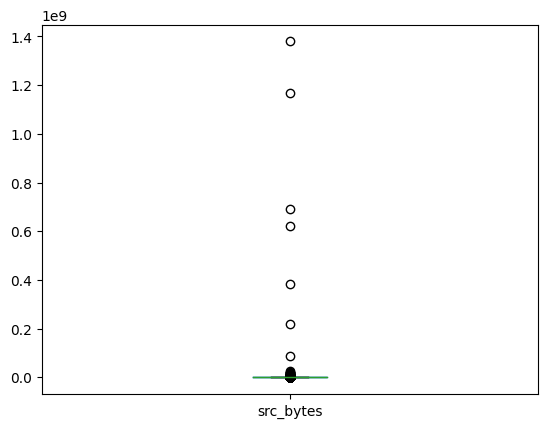

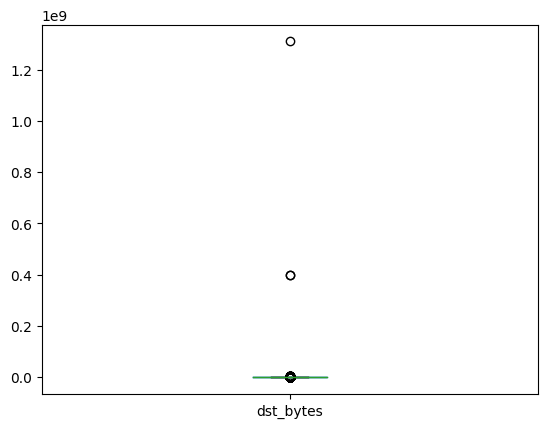

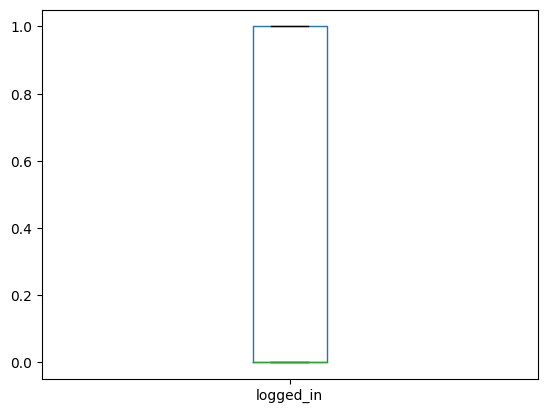

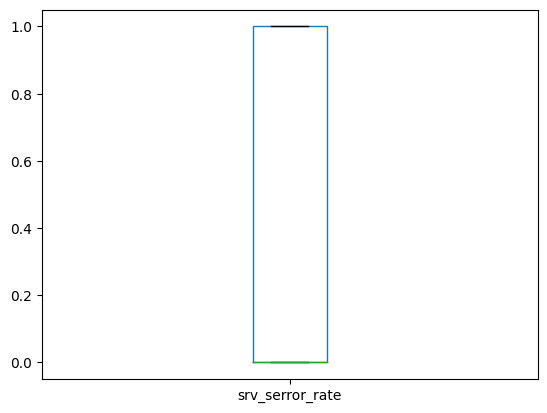

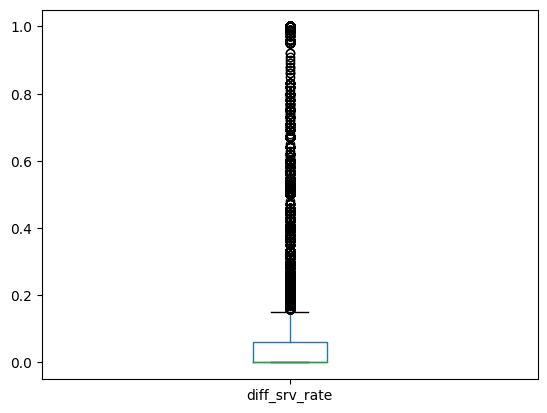

       flag  src_bytes  dst_bytes  logged_in  srv_serror_rate  diff_srv_rate  \
0        SF        491          0          0             0.00           0.00   
1        SF        146          0          0             0.00           0.15   
2        S0          0          0          0             1.00           0.07   
4        SF        199        420          1             0.00           0.00   
5       REJ          0          0          0             0.00           0.06   
...     ...        ...        ...        ...              ...            ...   
125967   SF        359        375          1             0.09           0.00   
125968   S0          0          0          0             1.00           0.06   
125969   SF        105        145          0             0.00           0.00   
125971   S0          0          0          0             1.00           0.05   
125972   SF        151          0          1             0.00           0.00   

          class  
0        normal  
1  

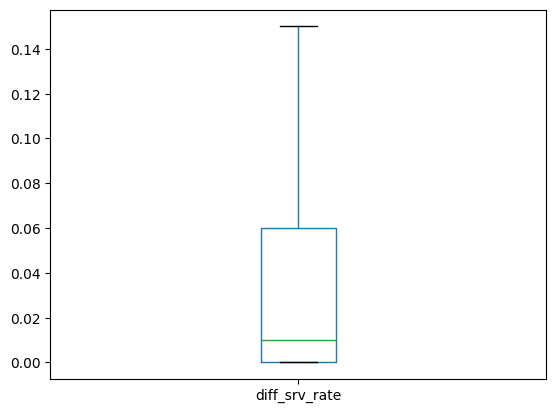

In [3]:
# *********** LES VALEURS ABBERANTS ***********
print(df.describe())   
# visualiser les données
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
   
#supprimer les valeurs abberants 
def abb(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls

indexlist = []
for i in ["src_bytes", "dst_bytes", "logged_in", "srv_serror_rate", "diff_srv_rate"]:
    indexlist.extend(abb(df, i))
    
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

plot_boxplot(df, "src_bytes")
plot_boxplot(df, "dst_bytes")
plot_boxplot(df, "logged_in")
plot_boxplot(df, "srv_serror_rate")
plot_boxplot(df, "diff_srv_rate")

clean_df = remove(df, indexlist)
print(clean_df)

plot_boxplot(clean_df, "diff_srv_rate")